In [1]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_norm.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_norm_drop.xlsx")

In [2]:
data_main


,Unnamed: 0,FORCE_B(Right),X_COR_C(Left),FSR_C(Left)
0,0,0.0,0.199050,0.272727
1,1,0.0,0.199050,0.242424
2,2,0.0,0.199050,0.212121
3,3,0.0,0.199050,0.181818
4,4,0.0,0.199050,0.181818
...,...,...,...,...
632,632,0.0,0.260917,0.212121
633,633,0.0,0.260917,0.242424
634,634,0.0,0.260917,0.242424
635,635,0.0,0.260917,0.242424


In [3]:
data

,Unnamed: 0,FORCE_B(Right),X_COR_C(Left),FSR_C(Left)
0,0,0.0,0.199050,0.272727
1,1,0.0,0.199050,0.242424
2,2,0.0,0.199050,0.212121
3,3,0.0,0.199050,0.181818
4,4,0.0,0.199050,0.181818
...,...,...,...,...
632,632,0.0,0.260917,0.212121
633,633,0.0,0.260917,0.242424
634,634,NaN,NaN,NaN
635,635,0.0,0.260917,0.242424


In [4]:
print(data.isnull().sum())
data.drop(columns="Unnamed: 0",inplace=True)
data_main.drop(columns="Unnamed: 0",inplace=True)

Unnamed: 0         0
FORCE_B(Right)    87
X_COR_C(Left)     87
FSR_C(Left)       87
dtype: int64


In [5]:
data.shape

(637, 3)

In [6]:
print((82/601)*100)


13.643926788685523


FORCE_B(Right)


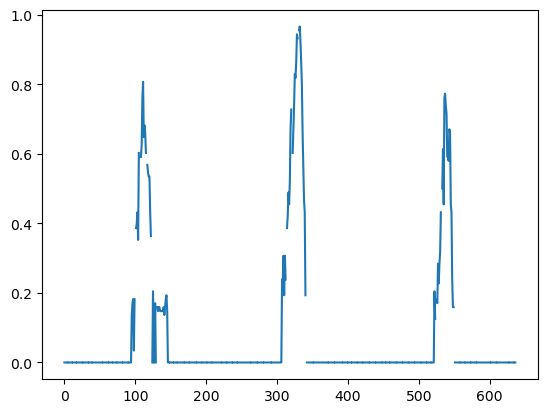

X_COR_C(Left)


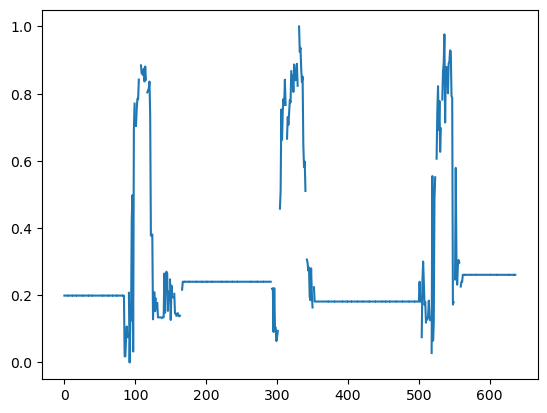

FSR_C(Left)


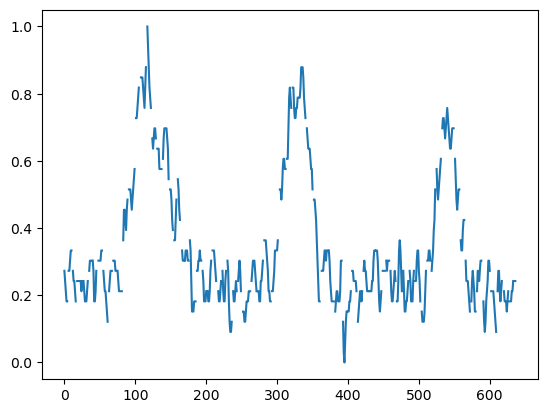

In [7]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [8]:
## R_FORCE_B : L_FORCE_C
## R_FORCE_B : Force_C(Left).1

In [9]:
from sklearn.preprocessing import MinMaxScaler

data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_data_main.xlsx")





In [10]:
data2.columns

Index(['Unnamed: 0', 'FORCE_B(Right)', 'X_COR_C(Left)', 'FSR_C(Left)'], dtype='object')

In [11]:

L2=data2.loc[:,['X_COR_C(Left)','FSR_C(Left)']]

scaler=MinMaxScaler()
L_scaled=scaler.fit_transform(L2)

In [12]:
data2=pd.DataFrame(data=L_scaled)


In [13]:
data2=data2.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")

In [14]:
data2

,X_COR_C(Left),FSR_C(Left)
0,0.199050,0.272727
1,0.199050,0.242424
2,0.199050,0.212121
3,0.199050,0.181818
4,0.199050,0.181818
...,...,...
632,0.260917,0.212121
633,0.260917,0.242424
634,0.260917,0.242424
635,0.260917,0.242424


In [15]:
R=data.loc[:,['FORCE_B(Right)']]
L=data.loc[:,['X_COR_C(Left)','FSR_C(Left)']]

<Axes: >

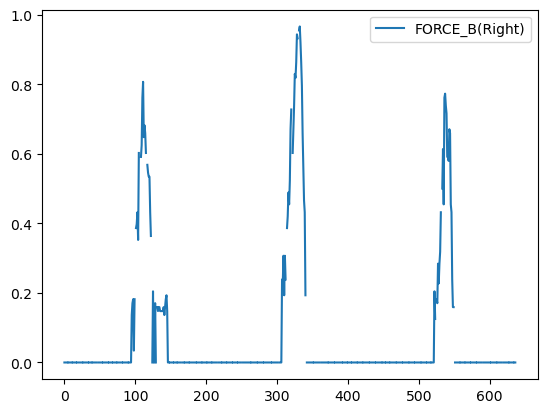

In [16]:
R.plot()

<Axes: >

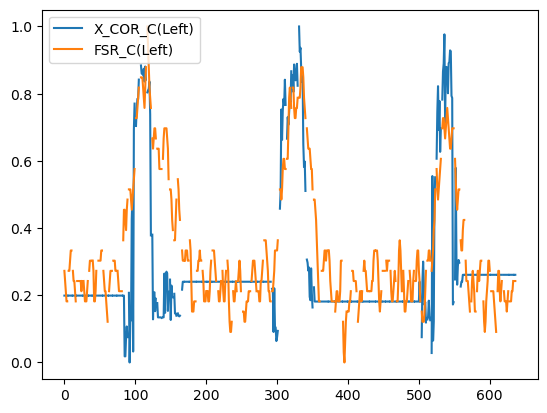

In [17]:
L.plot()

In [20]:
import numpy as np

index=R.index

loss_index_R_FORCE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]


normal_index_R_FORCE_B=np.setdiff1d(index,loss_index_R_FORCE_B)


In [21]:
index=L.index

loss_index_L_XCOR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_XCOR_C=np.setdiff1d(index,loss_index_L_XCOR_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [22]:
## R_FORCE_B : L_FORCE_C
##  R_FORCE_B : L_FSR_C 

In [23]:
x_train_R_FORCE_B=normal_index_R_FORCE_B.reshape(-1,1)
y_train_L_XCOR_C=L.iloc[normal_index_L_XCOR_C,0]
x_test_L_XCOR_C=loss_index_L_XCOR_C

y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_XCOR_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [24]:
data_main.columns

Index(['FORCE_B(Right)', 'X_COR_C(Left)', 'FSR_C(Left)'], dtype='object')

In [26]:

#{'n_estimators': 246, 'learning_rate': 0.370348928383778, 'max_depth': 2}
from xgboost.sklearn import XGBClassifier, XGBRegressor

model = XGBRegressor()
model.fit(x_train_R_FORCE_B,y_train_L_XCOR_C)
y_pred = model.predict(x_test_L_XCOR_C)
    
c=0
for i in loss_index_L_XCOR_C:    
    L_XCOR_C[i]=y_pred[c]
    c+=1


    


/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [27]:
#Best is trial 558 with value: 0.00943636272518866.
#{'n_estimators': 246, 'learning_rate': 0.370348928383778, 'max_depth': 2}

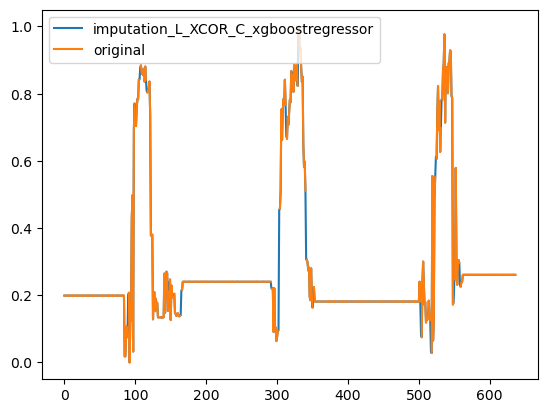

In [27]:
import matplotlib.pyplot as plt 
plt.plot(L_XCOR_C,label='imputation_L_XCOR_C_xgboostregressor')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [28]:
#{'n_estimators': 235, 'learning_rate': 0.1313228888605187, 'max_depth': 2}


model = XGBRegressor()
model.fit(x_train_R_FORCE_B,y_train_L_FSR_C)
y_pred = model.predict(x_test_L_FSR_C)

/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


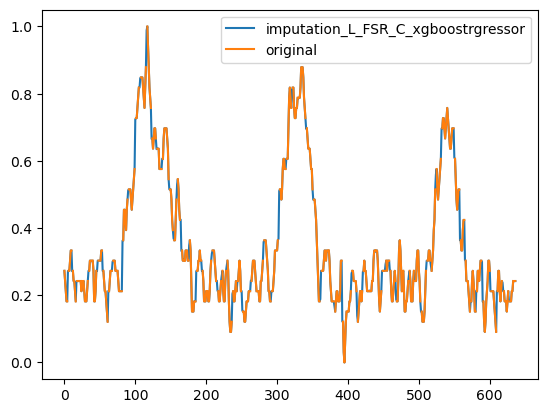

In [29]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=y_pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='imputation_L_FSR_C_xgboostrgressor')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [30]:
data_main.columns

Index(['FORCE_B(Right)', 'X_COR_C(Left)', 'FSR_C(Left)'], dtype='object')

In [31]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['X_COR_C(Left)'],L_XCOR_C))
print(RMSE(data_main['FSR_C(Left)'],L_FSR_C))

0.013028691421484816
0.013259560406443785


In [32]:
L.isnull().sum()


X_COR_C(Left)    87
FSR_C(Left)      87
dtype: int64

In [33]:
L.columns

Index(['X_COR_C(Left)', 'FSR_C(Left)'], dtype='object')

In [35]:
for i in loss_index_L_XCOR_C:    
    L['X_COR_C(Left)'][i]=L_XCOR_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR_C(Left)'][i]=L_FSR_C[i]

<Axes: >

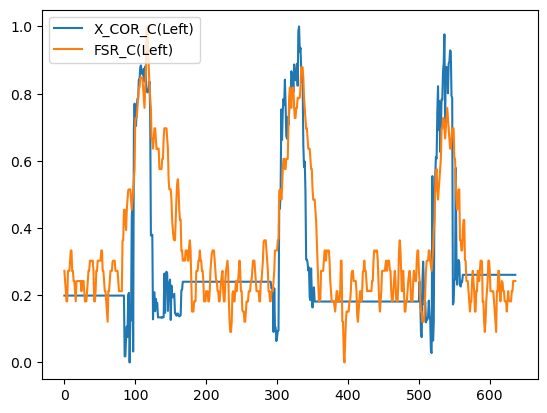

In [36]:
L=L.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")
L.plot()

<Axes: >

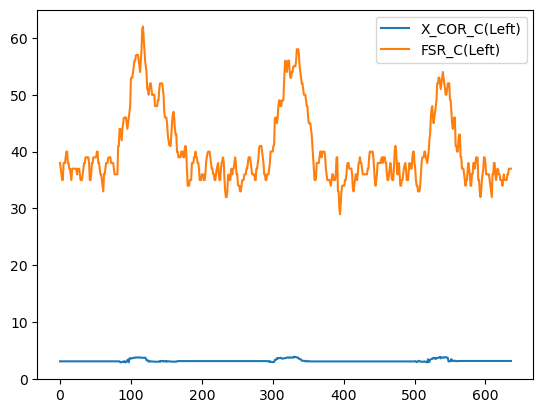

In [37]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")
L_sca.plot()